Kaggle データセットの分析  
https://www.kaggle.com/neuromusic/avocado-prices

アメリカのハスアボカドというアボカドの品種に関する小売データセット。  
各都市の一週間ごとデータが記録されている。

- 日付 2015-01-04 ～ 2018-03-25
- アボカド1個あたり平均価格
- 消費量？
- PLU codes 生鮮食品を販売管理するためのコード。4046はアボカドサイズ（小）、4225は中、4770は大を意味する。
- TotalBags small+large+xlarge bags
- type 従来型か有機栽培か
- 都市

分析案  
- 層別（regeonごと）の平均価格の平均、総量の平均をみる
- 系列の周期性があるか確認
- 周期性あり→層別にモデルを作るのではなく、層の情報を生かしたモデルを調査
- 周期性なし→再検討

In [1]:
import pandas as pd
import numpy as np

In [2]:
# ファイル読み込み
in_file = '../data/avocado.csv'
df = pd.read_csv(in_file, header=0, index_col=0)

# 日付を文字列から日付型に変換
df['Date'] = pd.to_datetime(df['Date'])
df['type'] = pd.Series(np.where(df.type=='conventional', 1, 0), name='type')
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,Albany


In [3]:
# テーブルサイズ確認
df.shape

(18249, 13)

In [4]:
# データの基本統計量確認
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.0,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,1.0,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.0,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.0,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,1.0,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,1.0,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.0,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.0,2018.000000


In [5]:
# regionラベル54個の一覧表示
for reg in set(df.region): print(reg, end=' ')

WestTexNewMexico SanDiego StLouis Roanoke SouthCentral LasVegas SouthCarolina Chicago HartfordSpringfield Louisville GreatLakes Midsouth Atlanta California CincinnatiDayton DallasFtWorth Houston Indianapolis Boston Sacramento NorthernNewEngland TotalUS West Philadelphia PhoenixTucson MiamiFtLauderdale Detroit Seattle Spokane GrandRapids NewOrleansMobile Syracuse SanFrancisco Nashville NewYork Portland Jacksonville BuffaloRochester HarrisburgScranton Boise Charlotte LosAngeles Southeast Northeast RichmondNorfolk RaleighGreensboro Tampa Albany Denver Orlando Columbus Pittsburgh BaltimoreWashington Plains 

In [6]:
# regionごとに平均値出力
df_groupby = df.groupby("region",as_index=False)
df_groupby.mean().head()

,region,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,Albany,1.561036,47537.869734,1824.081775,37621.208254,162.832337,7929.747367,6647.765473,1153.496213,128.488639,1,2016.147929
1,Atlanta,1.337959,262145.322041,146116.867959,31218.510385,311.385769,84498.560888,51605.727337,32070.044556,822.786036,1,2016.147929
2,BaltimoreWashington,1.534231,398561.891479,35656.218166,245982.888876,12466.730976,104456.053462,100939.683195,2903.984586,612.382722,1,2016.147929
3,Boise,1.348136,42642.567308,20019.507604,3461.682367,3186.787840,15974.592456,13840.037249,2103.634083,30.915207,1,2016.147929
4,Boston,1.530888,287792.854527,4994.610059,214219.864290,4982.294970,63596.085207,58906.590355,4438.364704,251.124231,1,2016.147929


In [7]:
# regionごと平均の基本統計量
df_groupby.mean().describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
count,54.000000,5.400000e+01,5.400000e+01,5.400000e+01,54.000000,5.400000e+01,5.400000e+01,5.400000e+01,54.000000,54.0,54.000000
mean,1.405955,8.505751e+05,2.930015e+05,2.951169e+05,22837.438880,2.396171e+05,1.821745e+05,5.433654e+04,3106.069740,1.0,2016.147898
std,0.166653,2.419120e+06,8.683353e+05,8.363299e+05,66626.358138,6.768062e+05,5.138323e+05,1.607019e+05,9179.465604,0.0,0.000226
min,1.047929,3.237476e+04,9.816233e+02,3.461682e+03,78.368846,7.929747e+03,6.647765e+03,2.269676e+02,21.250651,1.0,2016.146269
25%,1.287848,1.052357e+05,2.052716e+04,3.167778e+04,834.040740,3.481852e+04,2.645064e+04,3.273603e+03,258.645022,1.0,2016.147929
50%,1.400725,2.120883e+05,5.705663e+04,6.370831e+04,4783.209911,5.569507e+04,4.129541e+04,1.216920e+04,639.571169,1.0,2016.147929
75%,1.515947,5.419719e+05,1.677572e+05,2.380421e+05,11830.519808,1.480396e+05,1.158157e+05,3.462434e+04,1239.461501,1.0,2016.147929
max,1.818639,1.735130e+07,6.079693e+06,5.961573e+06,462056.754822,4.847931e+06,3.679175e+06,1.105279e+06,63477.013432,1.0,2016.147929


In [8]:
# seabornで可視化
# これで都市ごと年毎に平均価格が異なるということがわかる
# カーネル通りに実行
# https://www.kaggle.com/neuromusic/avocado-prices-across-regions-and-seasons
import seaborn as sns
sns.set_style('white')

mask = df['type']==1
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=8,
                   aspect=0.6,
                   palette='Blues',
                   join=False,
              )

In [9]:
order = (
    df[mask & (df['year']==2018)]
    .groupby('region')['AveragePrice']
    .mean()
    .sort_values()
    .index
)

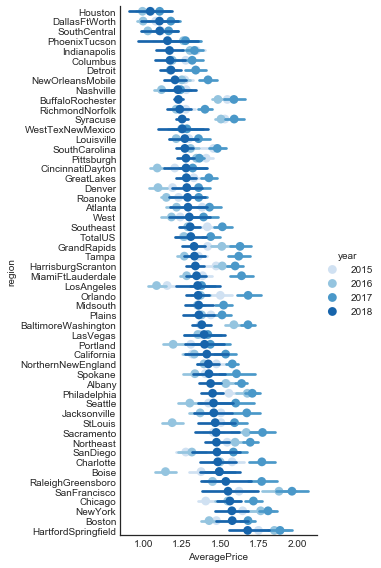

In [10]:
# ソートして最後プロット
# アメリカ南部ほど安く、北部ほど高い傾向
# これもカーネル通り実行
# https://www.kaggle.com/neuromusic/avocado-prices-across-regions-and-seasons
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=8,
                   aspect=0.6,
                   palette='Blues',
                   order=order,
                   join=False,
              )

In [11]:
# 都市をダミー変数に変換して結合
cities = pd.get_dummies(df.region, prefix='City')
df_dummy = pd.concat([df, cities], axis=1)

In [12]:
# 予測用データセット作成
y = {'average price': df_dummy['AveragePrice']}
del df_dummy['AveragePrice']
del df_dummy['Date']
del df_dummy['region']
del df_dummy['4046']
del df_dummy['4225']
del df_dummy['4770']

In [13]:
# 学習データとテストデータ作成
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummy, pd.DataFrame(y))

C:\Users\tsk_sato\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
# モデル作成
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
lars = linear_model.Lars()
lars_cv = linear_model.LarsCV()
lasso = linear_model.Lasso()
lasso_cv = linear_model.LassoCV()
lasso_lars = linear_model.LassoLars()
lasso_lars_cv = linear_model.LassoLarsCV()
lasso_lars_aic = linear_model.LassoLarsIC(criterion='aic')
lasso_lars_bic = linear_model.LassoLarsIC(criterion='bic')
linear_reg = linear_model.LinearRegression()
knn_1 = KNeighborsRegressor(n_neighbors=1)
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_5 = KNeighborsRegressor(n_neighbors=5)
knn_7 = KNeighborsRegressor(n_neighbors=7)
knn_9 = KNeighborsRegressor(n_neighbors=9)
knn_11 = KNeighborsRegressor(n_neighbors=11)

In [22]:
def run(model, lab):
    model.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    ac_mse = mean_squared_error(y_test, y_pred)
    ac_r2 = r2_score(y_test, y_pred)
    print('{:12}\tMSE: {:.4f}\tR2: {:.4f}'.format(lab, ac_mse, ac_r2))

In [26]:
# 精度確認
run(lars, 'lars')
run(lars_cv, 'lars_cv')
run(lasso, 'lasso')
run(lasso_cv, 'lasso_cv')
run(lasso_lars, 'lasso_lars')
run(lasso_lars_cv, 'lasso_lars_cv')
run(lasso_lars_aic, 'lasso_lars_aic')
run(lasso_lars_bic, 'lasso_lars_bic')
run(linear_reg, 'linear_reg')
run(knn_1, 'knn_1')
run(knn_3, 'knn_3')
run(knn_5, 'knn_5')
run(knn_7, 'knn_7')
run(knn_9, 'knn_9')
run(knn_11, 'knn_11')

lars        	MSE: 0.1256	R2: 0.2259
lars_cv     	MSE: 0.1256	R2: 0.2259
lasso       	MSE: 0.1562	R2: 0.0370
lasso_cv    	MSE: 0.1562	R2: 0.0375
lasso_lars  	MSE: 0.1623	R2: -0.0001
lasso_lars_cv	MSE: 0.1256	R2: 0.2259
lasso_lars_aic	MSE: 0.1256	R2: 0.2259
lasso_lars_bic	MSE: 0.1262	R2: 0.2221
linear_reg  	MSE: 0.1256	R2: 0.2259
knn_1       	MSE: 0.1243	R2: 0.2337
knn_3       	MSE: 0.0851	R2: 0.4756
knn_5       	MSE: 0.0774	R2: 0.5229
knn_7       	MSE: 0.0751	R2: 0.5371
knn_9       	MSE: 0.0741	R2: 0.5431
knn_11      	MSE: 0.0735	R2: 0.5473
